# Computer Exercise 5

In [88]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [89]:
def print_img_subplot(ax, img, title, is_gray):
    if is_gray:
        im_plt = ax.imshow(img, cmap='gray', interpolation=None)
    else:
        im_plt = ax.imshow(img, interpolation=None)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    return im_plt

###  Creating Gaussian

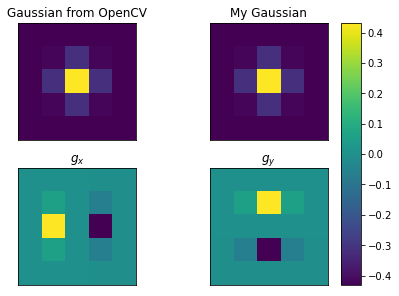

In [90]:
ksize = 5
sigma = 0.5

g = cv2.getGaussianKernel(ksize, sigma)
gg = g.dot(g.T)

outputs = [(gg, "Gaussian from OpenCV")]

my_gg = np.zeros((ksize,ksize))
for i, row in enumerate(my_gg):
    for j, val in enumerate(row):
        y = i - (ksize-1)/2
        x = j - (ksize-1)/2
        my_gg[i,j] = (1.0/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-0.5*((x**2+y**2)/(sigma**2)))
outputs.append((my_gg, "My Gaussian"))

deriv_x = np.zeros((ksize,ksize))
for i, row in enumerate(deriv_x):
    for j, val in enumerate(row):
        y = i - (ksize-1)/2
        x = j - (ksize-1)/2
        deriv_x[i,j] = (-x/(sigma**2))*my_gg[i,j]
outputs.append((deriv_x, "$g_x$"))

deriv_y = np.zeros((ksize,ksize))
for i, row in enumerate(deriv_y):
    for j, val in enumerate(row):
        y = i - (ksize-1)/2
        x = j - (ksize-1)/2
        deriv_y[i,j] = (-y/(sigma**2))*my_gg[i,j]
outputs.append((deriv_y, "$g_y$"))

fig1, axs1 = plt.subplots(2, 2, constrained_layout=True)

for i, out in enumerate(outputs):
    im_plt = print_img_subplot(axs1[int(i/2),i%2], out[0], out[1], False)

fig1.colorbar(im_plt, ax=axs1, location='right', shrink=1.)
plt.show()

### Directional Filters

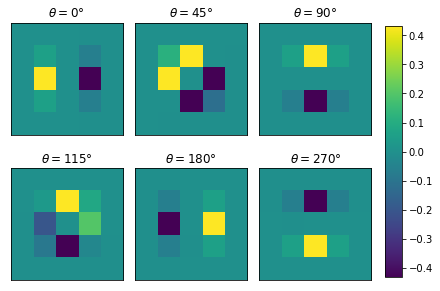

In [91]:
def create_theta_filter(theta):
    deriv_theta = np.zeros((ksize,ksize))
    for i, row in enumerate(deriv_theta):
        for j, val in enumerate(row):
            y = i - (ksize-1)/2
            x = j - (ksize-1)/2
            deriv_theta[i,j] = np.cos(theta)*deriv_x[i,j] + np.sin(theta)*deriv_y[i,j]
    return deriv_theta


angles = [0, 45, 90, 115, 180, 270]
theta_filters = []

fig1, axs1 = plt.subplots(2, 3, constrained_layout=True)

for i, theta in enumerate(angles):
    deriv_theta = create_theta_filter(theta*((np.pi)/(180)))
    theta_filters.append((theta, deriv_theta))
    im_plt = print_img_subplot(axs1[int(i/3),i%3], deriv_theta, "$\\theta = " + str(theta) + "\degree$", False)

fig1.colorbar(im_plt, ax=axs1, location='right', shrink=0.9)
plt.show()

### Results

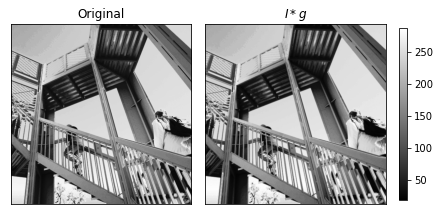

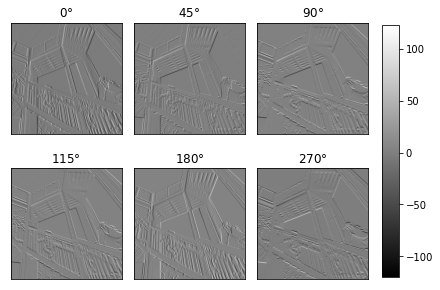

In [94]:
img = cv2.imread("./hw2_data/ascent.jpg", 0)
img = np.float64(img)
my_gfilter = cv2.filter2D(img, -1, my_gg)

fig1, axs1 = plt.subplots(1, 2, constrained_layout=True)

print_img_subplot(axs1[0], img, "Original", True)
im_plt = print_img_subplot(axs1[1], my_gfilter, "$I*g$", True)

fig1.colorbar(im_plt, ax=axs1, location='right', shrink=0.6)
plt.show()

fig2, axs2 = plt.subplots(2, 3, constrained_layout=True)

for i, theta_filter in enumerate(theta_filters):
    res = cv2.filter2D(my_gfilter, -1, theta_filter[1])
    im_plt = print_img_subplot(axs2[int(i/3),i%3], res, "$" + str(theta_filter[0]) + "\degree$", True)

fig2.colorbar(im_plt, ax=axs2, location='right', shrink=0.9)
plt.show()